<a href="https://colab.research.google.com/github/imranttsia/Deep-learning/blob/main/Boston_Housing_dataset_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.6 Predicting house prices: a regression example

3.6.1 The Boston Housing Price dataset

we have to predict price

boston housing mid-1970

506 data samples

404 training and 102 testing samples

13 Features (number of columns in X)

Listing 3.24 Loading the Boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_targets[0]

15.2

3.6.2 Preparing the data

Listing 3.25 Normalizing the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
train_data[0]


array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [9]:
(21 - 1.84759901e+01)/2.19765689e+00


1.1485004376638608

In [10]:
train_data.std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

3.6.3 Building your network

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Listing 3.27 K-fold validation

In [12]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Listing 3.29 Building the history of successive mean K-fold validation scores

In [14]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [15]:
average_mae_history


[6.268870830535889,
 4.265023231506348,
 3.5548295974731445,
 3.4444174766540527,
 3.0153074264526367,
 3.0407180786132812,
 2.815774440765381,
 2.7230944633483887,
 2.6828453540802,
 3.160799026489258,
 2.619581699371338,
 2.561094284057617,
 2.6732611656188965,
 2.5163824558258057,
 2.7008795738220215,
 2.6189210414886475,
 2.6227617263793945,
 2.626046895980835,
 2.646026611328125,
 2.5681471824645996,
 2.3877265453338623,
 2.304515838623047,
 2.3525445461273193,
 2.8628690242767334,
 2.457298755645752,
 2.4193196296691895,
 2.734607458114624,
 2.2515764236450195,
 2.324070930480957,
 2.330831289291382,
 2.4543709754943848,
 2.1954009532928467,
 2.2196364402770996,
 2.6828396320343018,
 2.3341901302337646,
 2.555185079574585,
 2.563328504562378,
 2.4133472442626953,
 2.447650909423828,
 2.2363152503967285,
 2.2977054119110107,
 2.2752647399902344,
 2.143901824951172,
 2.200640916824341,
 2.451573371887207,
 2.4577600955963135,
 2.5054967403411865,
 2.3316280841827393,
 2.34246420860

Listing 3.30 Plotting validation scores

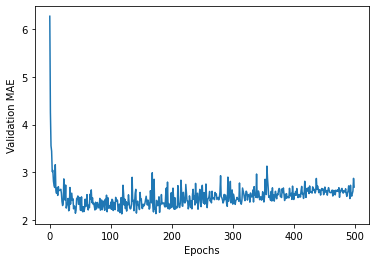

In [16]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

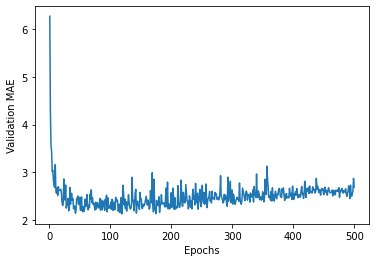

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Listing 3.31 Plotting validation scores, excluding the first 10 data points

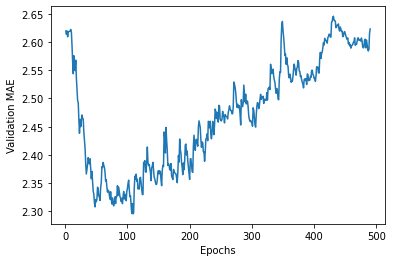

In [18]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Listing 3.32 Training the final model

In [19]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.1925 - mae: 2.7565


In [20]:
test_mse_score

18.19252586364746

In [21]:
test_mae_score

2.756525993347168

You’re still off by about $2,550.

In [22]:
model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


array([[ 9.388829],
       [19.104954],
       [22.25843 ],
       [34.26942 ],
       [24.61388 ],
       [21.475626],
       [26.384459],
       [21.40181 ],
       [19.898418],
       [23.79289 ],
       [19.072456],
       [16.169752],
       [17.19141 ],
       [42.047634],
       [21.716093],
       [19.652672],
       [25.171005],
       [18.666893],
       [20.027414],
       [26.86638 ],
       [13.153802],
       [15.888436],
       [21.620358],
       [14.234383],
       [17.638165],
       [25.6204  ],
       [28.695215],
       [29.498768],
       [12.704264],
       [19.797916],
       [19.521564],
       [15.568713],
       [32.292767],
       [23.716803],
       [19.421951],
       [ 8.784637],
       [17.439297],
       [17.201826],
       [20.600988],
       [25.466059],
       [31.033009],
       [26.769207],
       [14.957459],
       [42.903355],
       [29.859211],
       [25.57787 ],
       [27.27745 ],
       [18.562592],
       [24.952007],
       [22.164663],
